In [9]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from pyprojroot import here
import janitor
import pandas as pd
from scipy.special import logit

In [4]:
df_bioc = (
    pd.read_csv(here() / "data/df_bioc.csv", index_col=0)
    .query("frac_avg != 0")
    .transform_column("frac_avg", lambda x: 1 - x, "inv_frac_avg")
    .transform_column("inv_frac_avg", logit, "logit_inv")
    .change_type("logit_inv", float)
    .transform_column("frac_avg", logit, "logit")
    .change_type("logit", float)
)

In [5]:
entropy_columns = [c for c in df_bioc.columns if "shannon" in c]
def avg_entropy(row: pd.Series):
    total = 0
    count = 0
    data = row[row != -1]
    return data.mean()

avg_entropy = df_bioc[entropy_columns].join_apply(avg_entropy, "avg_entropy")["avg_entropy"]
df_bioc = df_bioc.add_column("avg_entropy", avg_entropy)

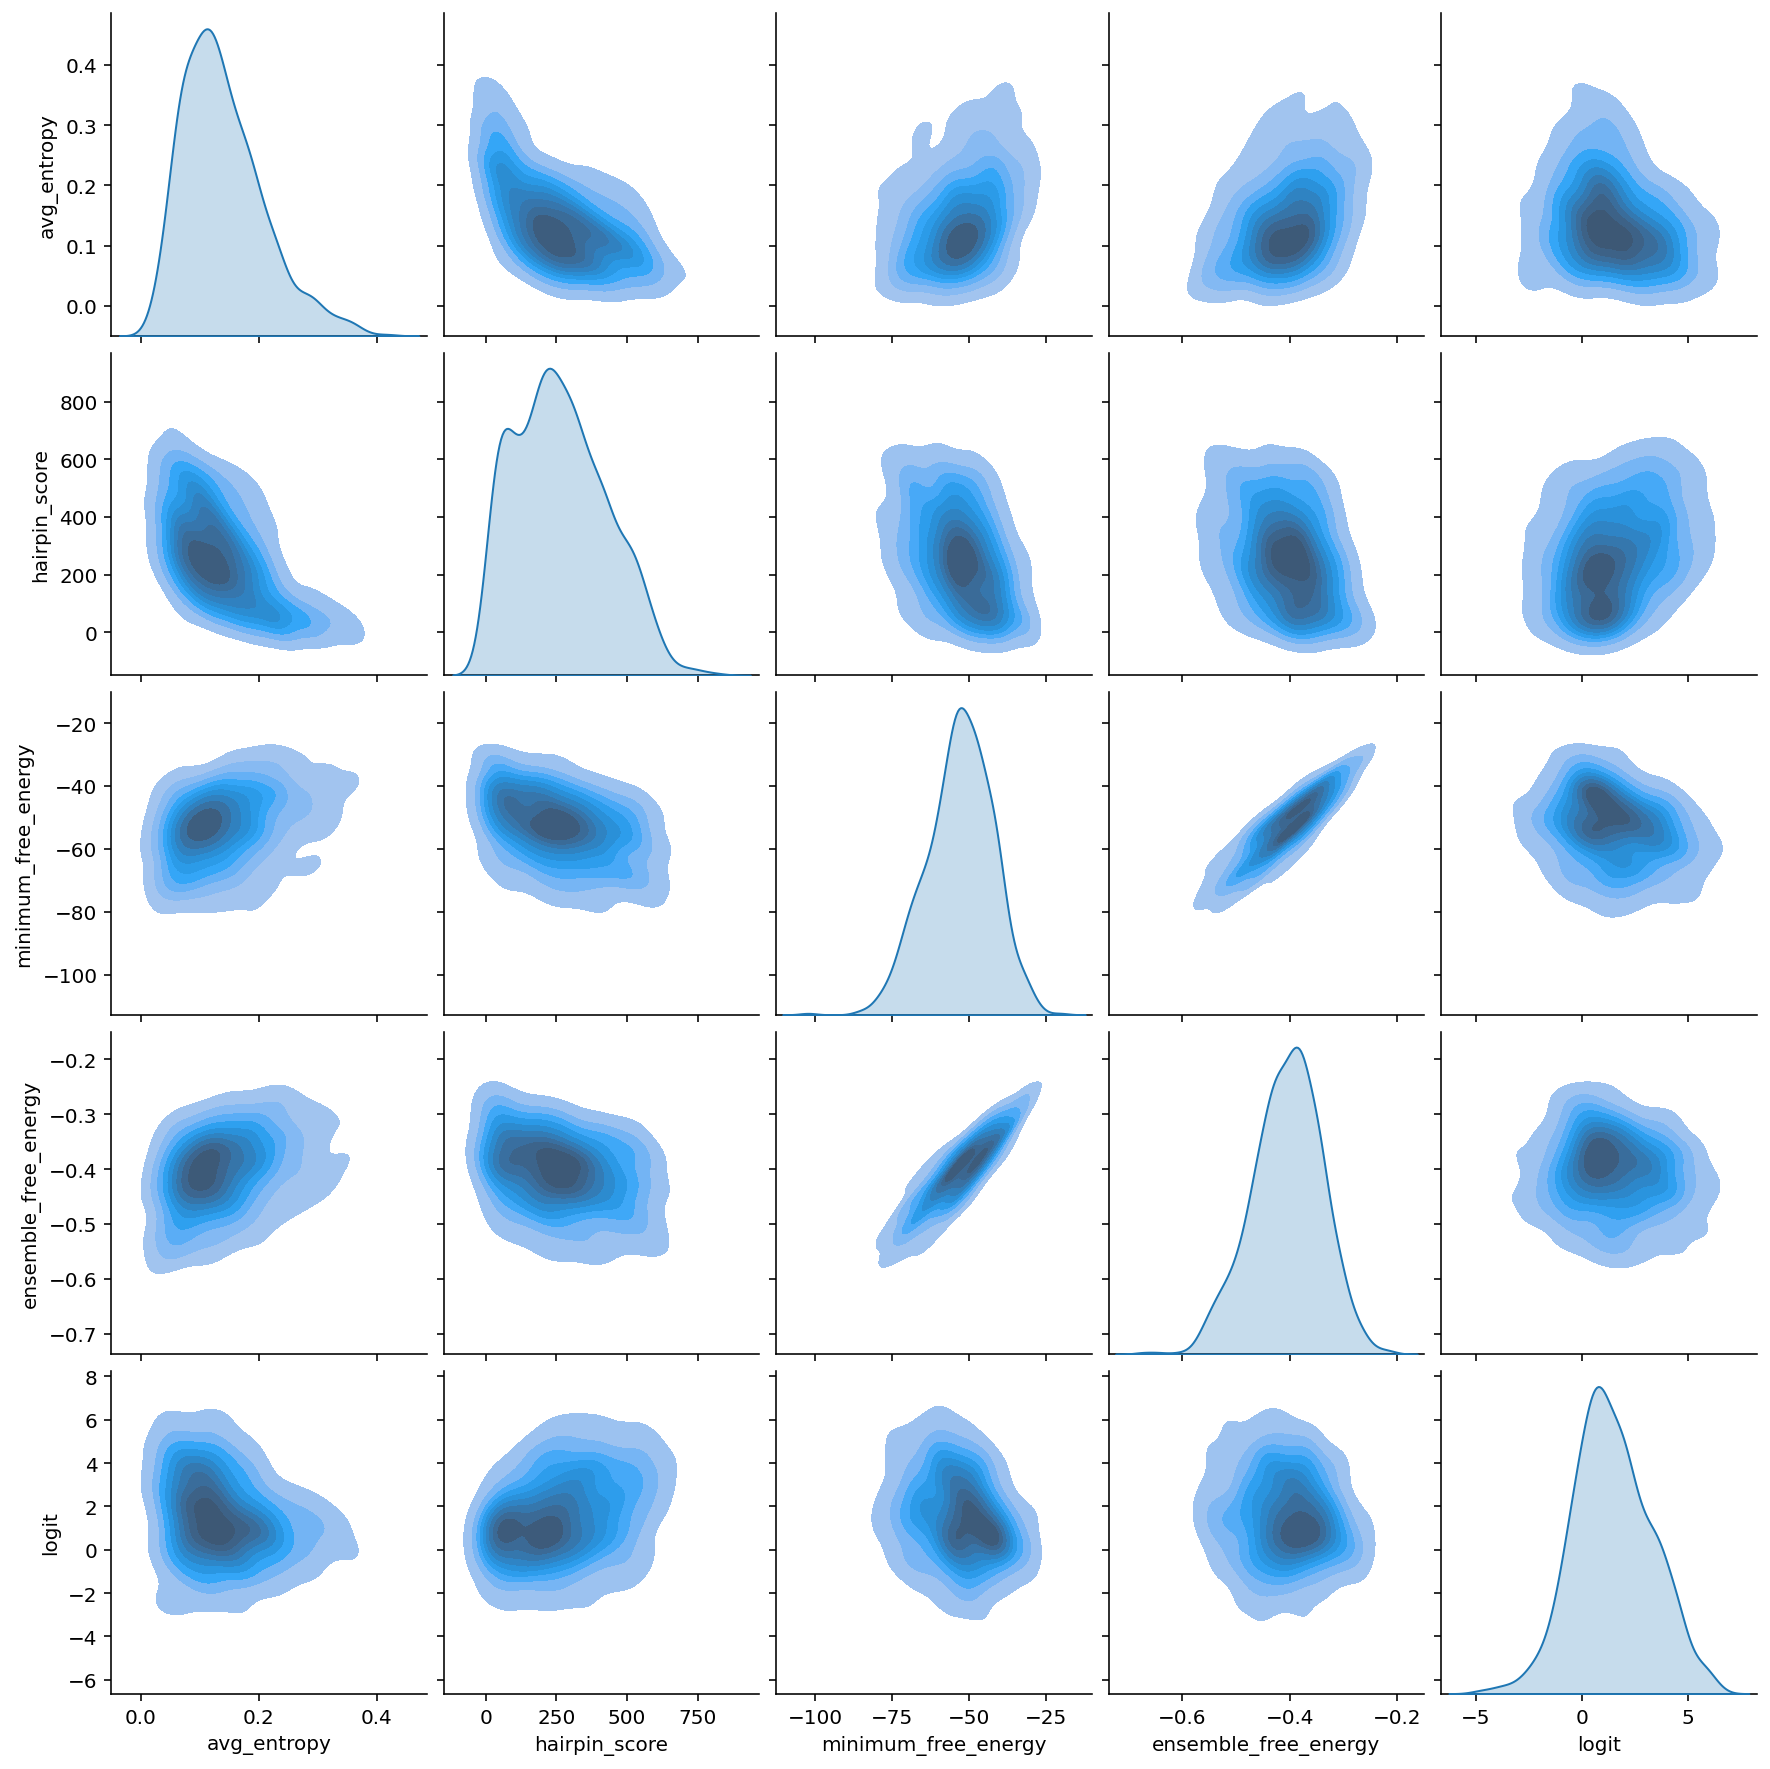

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['avg_entropy', 'hairpin_score', 'minimum_free_energy', 'ensemble_free_energy', 'logit']
sns.pairplot(df_bioc[cols], kind="kde", plot_kws={"fill": True})